<a href="https://colab.research.google.com/github/bbrauser/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Office_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
t

#If NBC decided that there was to be a tenth season of The Office, what writers would produce the highest rated episodes on IMDb?

In [1]:
from google.colab import files
uploaded = files.upload()

Saving XTheOfficeIMDBPerEpisodeX.csv to XTheOfficeIMDBPerEpisodeX (4).csv


In [25]:
# Overall Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy import stats
import math

In [19]:
# Making the dataframe
df = pd.read_csv('XTheOfficeIMDBPerEpisodeX.csv')

In [20]:
# Set max row display
pd.set_option('display.max_row', 188)

In [138]:
# Dropping "Season" and "Description" columns
df = df.drop(columns = ['Season', 'Description'])

KeyError: ignored

In [49]:
# Filtering out writers who have written 7 or more
# episodes and joining together
writers = df.groupby('WrittenBy').filter(lambda x: len(x) >= 5)
writers.shape

(130, 5)

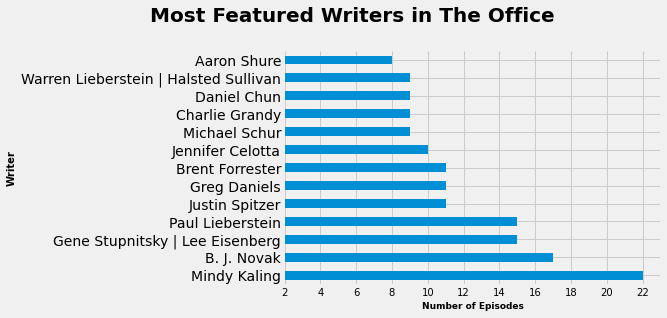

In [128]:
# Bar plot of Most Featured Writers
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# x-axis tick marks and tick labels
ax.set_xticks(range(0,28,2))
ax.set_xticklabels(['2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26'], fontsize=10)

# x axis label
ax.set_xlabel('Number of Episodes', fontsize=9, fontweight='bold')

# y axis label
ax.set_ylabel('Writer', fontsize=10, fontweight='bold')

# Graph title
ax.set_title("Most Featured Writers in The Office  ", x=.2, y=1.1, fontsize='20', fontweight='bold')

# Remove Spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

writers['WrittenBy'].value_counts()[:15].plot(kind = 'barh');

In [137]:
writers.sort_values('Rating')

,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy
159,2012-03-15,6.6,1944,Rainn Wilson,Charlie Grandy
161,2012-04-19,7.1,1857,Claire Scanlon,Justin Spitzer
143,2011-10-06,7.3,1858,John Krasinski,Charlie Grandy
181,2013-03-14,7.5,1931,Paul Lieberstein,Paul Lieberstein
153,2012-02-02,7.5,1717,Eric Appel,Aaron Shure
163,2012-05-03,7.6,1630,Daniel Chun,Warren Lieberstein | Halsted Sullivan
165,2012-09-20,7.6,1837,Greg Daniels,Greg Daniels
96,2009-10-15,7.6,2156,David Rogers,Brent Forrester
164,2012-05-10,7.7,1702,B. J. Novak,B. J. Novak
105,2010-02-04,7.7,1963,John Krasinski,Jennifer Celotta


In [ ]:
fax = dw_df.plot.bar(x = 'Director & Writer', y = 'Rating')